In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [9]:
url = 'Dataset/nilai-gizi.csv'
df = pd.read_csv(url)
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1651 non-null   object 
 1   manufacturer                1651 non-null   object 
 2   serving_size                1651 non-null   object 
 3   energy_kcal                 1651 non-null   float64
 4   protein_g                   1651 non-null   float64
 5   carbohydrate_g              1651 non-null   float64
 6   fat_g                       1651 non-null   float64
 7   sugar_g                     1651 non-null   float64
 8   sodium_mg                   1651 non-null   float64
 9   fiber_g                     1651 non-null   float64
 10  energy_percentage_dv        1651 non-null   float64
 11  protein_percentage_dv       1651 non-null   float64
 12  carbohydrate_percentage_dv  1651 non-null   float64
 13  fat_percentage_dv           1651 

,name,manufacturer,serving_size,energy_kcal,protein_g,carbohydrate_g,fat_g,sugar_g,sodium_mg,fiber_g,...,carbohydrate_percentage_dv,fat_percentage_dv,sodium_percentage_dv,Lemak jenuh,Natrium,Protein,Karbohidrat total,Energi,Lemak total,Serat pangan
0,"Ikan sunu, asin, mentah",Tidak Diketahui,20.30 g,199.0,34.10,7.10,3.80,0.0,377.0,0.00,...,2.18,5.67,25.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Soto pekalongan, masakan",Tidak Diketahui,1.30 g,94.0,3.00,5.10,6.80,0.0,0.0,0.30,...,1.57,10.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Marie duo,Tidak Diketahui,1 g,15.0,1.00,14.00,3.50,5.0,85.0,1.00,...,4.31,5.22,5.67,10.0,6.0,0.0,0.0,0.0,0.0,0.0
3,"Kaparende, sayur",Tidak Diketahui,1.30 g,38.0,2.40,2.60,2.00,0.0,170.0,1.50,...,0.80,2.99,11.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kacang lebui / iris,Tidak Diketahui,3.60 g,346.0,16.50,66.60,1.50,0.0,17.0,37.30,...,20.49,2.24,1.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The coffe bean & tea leaf pure vanilla ice ble...,Tidak Diketahui,15 g,410.0,15.00,70.00,9.00,63.0,0.0,0.00,...,21.54,13.43,0.00,0.0,0.0,25.0,22.0,20.0,0.0,0.0
6,Dairy queen banana split,Tidak Diketahui,4 g,520.0,9.00,92.00,14.00,72.0,0.0,4.00,...,28.31,20.90,0.00,0.0,0.0,0.0,29.0,25.0,21.0,0.0
7,"Gembili, ubi, segar",Tidak Diketahui,1 g,131.0,1.10,31.30,0.20,0.0,10.0,1.10,...,9.63,0.30,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Baked lotus paste mooncake with two egg yolks,Tidak Diketahui,0.85 g,223.0,4.05,20.50,13.79,0.0,0.0,0.85,...,6.31,20.58,0.00,0.0,0.0,7.0,0.0,11.0,21.0,0.0
9,Cumi-cumi,Tidak Diketahui,0.90 g,75.0,16.10,0.10,0.70,0.0,37.0,0.00,...,0.03,1.04,2.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Target yang mau diprediksi
target = "energy_kcal"

# Kolom nutrisi yang dipakai untuk memprediksi kalori
features = ["protein_g", "carbohydrate_g", "fat_g", "fiber_g", "sodium_mg"]

# Cek apakah kolomnya ada
print("Kolom yang dipakai:", features, "-> target:", target)


Kolom yang dipakai: ['protein_g', 'carbohydrate_g', 'fat_g', 'fiber_g', 'sodium_mg'] -> target: energy_kcal


In [11]:
# Copy dataset biar aman
data = df.copy()

# Ubah kolom fitur dan target jadi numerik (kalau ada teks akan jadi NaN)
for col in features + [target]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Buang baris yang ada nilai kosong (NaN) di fitur/target
data = data.dropna(subset=features + [target])

print("Jumlah data setelah dibersihkan:", data.shape)
data[features + [target]].head()


Jumlah data setelah dibersihkan: (1651, 22)


,protein_g,carbohydrate_g,fat_g,fiber_g,sodium_mg,energy_kcal
0,34.1,7.1,3.8,0.0,377.0,199.0
1,3.0,5.1,6.8,0.3,0.0,94.0
2,1.0,14.0,3.5,1.0,85.0,15.0
3,2.4,2.6,2.0,1.5,170.0,38.0
4,16.5,66.6,1.5,37.3,17.0,346.0


In [12]:
X = data[features]   # input
y = data[target]     # output (kalori)

# 80% data training, 20% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "| Test:", X_test.shape)


Train: (1320, 5) | Test: (331, 5)


In [13]:
# Random Forest bagus untuk data non-linear dan biasanya akurasinya tinggi
model = RandomForestRegressor(
    n_estimators=300,   # jumlah pohon (semakin besar biasanya makin stabil)
    random_state=42
)

model.fit(X_train, y_train)
print("Model selesai dilatih")


Model selesai dilatih


In [14]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)  # rata-rata selisih prediksi
r2 = r2_score(y_test, y_pred)             # semakin dekat 1 semakin bagus

print("MAE  :", round(mae, 2))
print("R^2  :", round(r2, 4))


MAE  : 22.26
R^2  : 0.9372


In [15]:
# contoh data baru (isi sesuai kebutuhan)
data_baru = pd.DataFrame([{
    "protein_g": 10,
    "carbohydrate_g": 30,
    "fat_g": 5,
    "fiber_g": 3,
    "sodium_mg": 200
}])

prediksi_kalori = model.predict(data_baru)[0]
print("Prediksi kalori (energy_kcal):", round(prediksi_kalori, 2))


Prediksi kalori (energy_kcal): 199.95


=== Evaluasi Regresi ===
MAE  : 22.26 kcal
RMSE : 44.4 kcal
R^2  : 0.9372


ValueError: x and y must be the same size

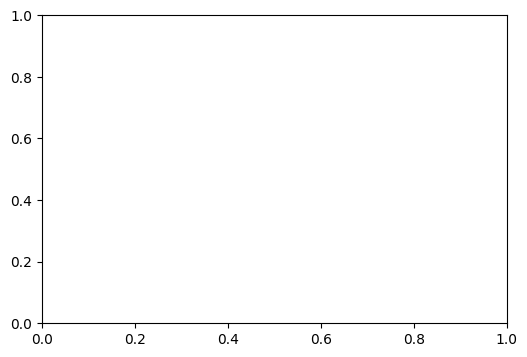

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 1) Hitung metrik evaluasi ===
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("=== Evaluasi Regresi ===")
print("MAE  :", round(mae, 2),  "kcal")
print("RMSE :", round(rmse, 2), "kcal")
print("R^2  :", round(r2, 4))

# === 2) Residual (Error) ===
residual = y_test - y_pred

# Residual Plot: Actual vs Residual
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.axhline(0)  # garis nol (ideal)
plt.title("Residual Plot (Aktual vs Error)")
plt.xlabel("Nilai Aktual (energy_kcal)")
plt.ylabel("Residual (Aktual - Prediksi)")
plt.grid(True)
plt.show()

# === 3) Histogram Residual (sebaran error) ===
plt.figure(figsize=(6,4))
plt.hist(residual, bins=30)
plt.title("Distribusi Residual (Error Prediksi)")
plt.xlabel("Residual (kcal)")
plt.ylabel("Jumlah Data")
plt.grid(True)
plt.show()
